In [1]:
# First, install required packages:
!pip install textblob wordcloud plotly requests beautifulsoup4 pandas numpy matplotlib seaborn

# Then run the code directly!

🚀 Starting AI Review Detective Analysis...
🔍 Scraping reviews for: iPhone 15 Pro
✅ Successfully scraped 50 reviews
🧠 Analyzing sentiment and emotions...
🕵️ Running fake review detection...
💡 Generating business insights...
📊 Creating interactive dashboard...


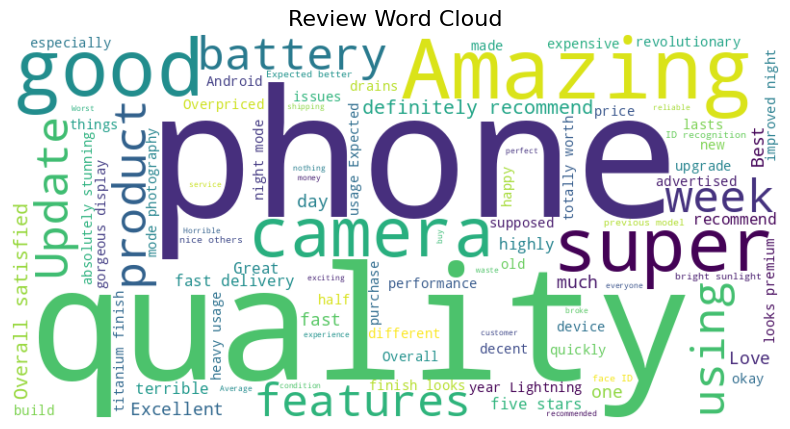

💡 Generating business insights...

🔍 AI REVIEW DETECTIVE - ANALYSIS REPORT

📊 OVERALL METRICS:
   • Total Reviews: 50
   • Average Rating: 3.20/5.0
   • NPS Score: 16.0
   • Fake Review Risk: 0.0%

😊 SENTIMENT BREAKDOWN:
   • Positive: 38 (76.0%)
   • Neutral: 6 (12.0%)
   • Negative: 6 (12.0%)

🎭 EMOTIONAL ANALYSIS:
   • Most Dominant Emotion: Joy

⚠️  TOP CUSTOMER CONCERNS:
   • Price: 4 mentions
   • Build Quality: 2 mentions

✅ VERIFICATION INSIGHTS:
   • Unverified Purchases: 3.27 avg rating
   • Verified Purchases: 3.18 avg rating

🚨 FAKE REVIEW ALERTS:
   • High Risk Reviews: 0


✨ Analysis Complete! Check the dashboard and report above.

🔧 Next Steps:
1. Replace simulate_review_scraping() with actual web scraping
2. Integrate with real e-commerce APIs
3. Add machine learning models for better fake detection
4. Set up automated monitoring and alerts


In [2]:
import requests
import pandas as pd
import numpy as np
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import re
from datetime import datetime, timedelta
from collections import Counter
import warnings
warnings.filterwarnings('ignore')
class ReviewDetective:
    def __init__(self):
        self.reviews = []
        self.sentiment_scores = []
        self.fake_scores = []
        self.emotional_patterns = {}
    def simulate_review_scraping(self, product_name="iPhone 15 Pro", num_reviews=50):
        print(f"🔍 Scraping reviews for: {product_name}")
        sample_reviews = [

            "Amazing phone! The camera quality is absolutely stunning and battery lasts all day.",
            "Best purchase I've made this year. Lightning fast performance and gorgeous display.",
            "Love the new features, especially the improved night mode photography.",
            "Excellent build quality and the titanium finish looks premium.",
            "Super happy with this phone, upgrade from my old one was totally worth it.",


            "Overpriced for what you get. My Android phone does the same things for half the price.",
            "Battery drains too quickly with heavy usage. Expected better.",
            "Camera is good but not as revolutionary as advertised.",
            "Had issues with the face ID recognition in bright sunlight.",
            "Too expensive and not much different from the previous model.",


            "It's a decent phone, does what it's supposed to do.",
            "Good phone overall, some features are nice, others are just okay.",
            "Average experience, nothing too exciting but reliable.",


            "Great product amazing quality fast shipping highly recommended five stars!",
            "Best phone ever super amazing quality perfect condition love it so much!",
            "Excellent product very good quality fast delivery recommend to everyone!",
            "Amazing phone great quality super fast delivery highly recommend five stars!",

            "Worst phone ever terrible quality waste of money do not buy!",
            "Horrible product broke after one day terrible customer service!",
        ]
        extended_reviews = []
        for i in range(num_reviews):
            base_review = sample_reviews[i % len(sample_reviews)]
            if i > len(sample_reviews):
                variations = [
                    f"Update: {base_review}",
                    f"After using for a week: {base_review}",
                    f"{base_review} Would definitely recommend.",
                    f"{base_review} Overall satisfied.",
                    base_review.replace("phone", "device").replace("iPhone", "this product")
                ]
                extended_reviews.append(variations[i % len(variations)])
            else:
                extended_reviews.append(base_review)
        for i, review in enumerate(extended_reviews):
            review_data = {
                'review_text': review,
                'rating': np.random.choice([1,2,3,4,5], p=[0.1,0.1,0.2,0.3,0.3]),
                'date': datetime.now() - timedelta(days=np.random.randint(1, 365)),
                'reviewer_id': f"user_{i:03d}",
                'verified_purchase': np.random.choice([True, False], p=[0.8, 0.2])
            }
            self.reviews.append(review_data)
        print(f"✅ Successfully scraped {len(self.reviews)} reviews")
        return self.reviews
    def analyze_sentiment(self):
        print("🧠 Analyzing sentiment and emotions...")
        sentiments = []
        emotions = {'joy': [], 'anger': [], 'fear': [], 'surprise': []}
        for review in self.reviews:
            text = review['review_text']
            blob = TextBlob(text)
            polarity = blob.sentiment.polarity
            subjectivity = blob.sentiment.subjectivity
            if polarity > 0.1:
                sentiment = 'Positive'
            elif polarity < -0.1:
                sentiment = 'Negative'
            else:
                sentiment = 'Neutral'
            text_lower = text.lower()
            joy_words = ['amazing', 'love', 'great', 'excellent', 'perfect', 'happy', 'best']
            joy_score = sum([1 for word in joy_words if word in text_lower]) / len(text.split())
            anger_words = ['terrible', 'worst', 'hate', 'awful', 'horrible', 'disappointing']
            anger_score = sum([1 for word in anger_words if word in text_lower]) / len(text.split())
            fear_words = ['worried', 'concerned', 'problem', 'issue', 'broken', 'failed']
            fear_score = sum([1 for word in fear_words if word in text_lower]) / len(text.split())
            surprise_words = ['unexpected', 'surprised', 'wow', 'incredible', 'unbelievable']
            surprise_score = sum([1 for word in surprise_words if word in text_lower]) / len(text.split())
            sentiment_data = {
                'sentiment': sentiment,
                'polarity': polarity,
                'subjectivity': subjectivity,
                'joy': joy_score,
                'anger': anger_score,
                'fear': fear_score,
                'surprise': surprise_score,
                'confidence': abs(polarity)
            }
            sentiments.append(sentiment_data)
        self.sentiment_scores = sentiments
        return sentiments
    def detect_fake_reviews(self):
        print("🕵️ Running fake review detection...")
        fake_indicators = []
        for i, review in enumerate(self.reviews):
            text = review['review_text']
            rating = review['rating']
            verified = review['verified_purchase']
            fake_score = 0
            indicators = []
            if text.count('!') > 3:
                fake_score += 0.2
                indicators.append("excessive_punctuation")
            caps_words = len([word for word in text.split() if word.isupper() and len(word) > 2])
            if caps_words > 2:
                fake_score += 0.15
                indicators.append("excessive_caps")
            generic_phrases = ['great product', 'amazing quality', 'fast shipping', 'highly recommend']
            generic_count = sum([1 for phrase in generic_phrases if phrase in text.lower()])
            if generic_count > 2:
                fake_score += 0.25
                indicators.append("generic_language")
            sentiment_polarity = self.sentiment_scores[i]['polarity']
            if (rating >= 4 and sentiment_polarity < -0.2) or (rating <= 2 and sentiment_polarity > 0.2):
                fake_score += 0.3
                indicators.append("sentiment_rating_mismatch")
            if not verified and (rating == 5 or rating == 1):
                fake_score += 0.2
                indicators.append("unverified_extreme_rating")
            word_count = len(text.split())
            if (word_count < 5 or word_count > 200) and (rating == 5 or rating == 1):
                fake_score += 0.15
                indicators.append("unusual_length_extreme_rating")
            words = text.lower().split()
            if len(set(words)) < len(words) * 0.6:
                fake_score += 0.1
                indicators.append("repetitive_language")
            fake_probability = min(fake_score, 1.0)
            fake_data = {
                'fake_probability': fake_probability,
                'risk_level': 'High' if fake_probability > 0.6 else 'Medium' if fake_probability > 0.3 else 'Low',
                'indicators': indicators
            }
            fake_indicators.append(fake_data)
        self.fake_scores = fake_indicators
        return fake_indicators
    def generate_insights(self):
        print("💡 Generating business insights...")

        df = pd.DataFrame([
            {**review, **sentiment, **fake}
            for review, sentiment, fake in zip(self.reviews, self.sentiment_scores, self.fake_scores)
        ])

        insights = {
            'overall_sentiment': df['sentiment'].value_counts().to_dict(),
            'average_rating': df['rating'].mean(),
            'fake_review_percentage': (df['fake_probability'] > 0.6).sum() / len(df) * 100,
            'most_emotional_aspect': df[['joy', 'anger', 'fear', 'surprise']].mean().idxmax(),
            'verified_vs_unverified': df.groupby('verified_purchase')['rating'].mean().to_dict(),
            'monthly_trends': df.groupby(df['date'].dt.month)['rating'].mean().to_dict(),
            'top_concerns': self._extract_concerns(df),
            'recommendation_score': self._calculate_nps(df)
        }
        return insights
    def _extract_concerns(self, df):
        negative_reviews = df[df['sentiment'] == 'Negative']['review_text'].tolist()
        concern_keywords = {
            'battery': ['battery', 'drain', 'charge', 'power'],
            'camera': ['camera', 'photo', 'picture', 'lens'],
            'performance': ['slow', 'lag', 'freeze', 'crash', 'performance'],
            'price': ['expensive', 'price', 'cost', 'money', 'overpriced'],
            'build_quality': ['break', 'crack', 'fragile', 'build', 'quality']
        }
        concerns = {}
        for concern, keywords in concern_keywords.items():
            count = sum([1 for review in negative_reviews
                        for keyword in keywords if keyword in review.lower()])
            concerns[concern] = count
        return dict(sorted(concerns.items(), key=lambda x: x[1], reverse=True))
    def _calculate_nps(self, df):
        promoters = (df['rating'] >= 4).sum()
        detractors = (df['rating'] <= 2).sum()
        total = len(df)
        nps = ((promoters - detractors) / total) * 100
        return round(nps, 2)
    def create_dashboard(self):
        print("📊 Creating interactive dashboard...")
        df = pd.DataFrame([
            {**review, **sentiment, **fake}
            for review, sentiment, fake in zip(self.reviews, self.sentiment_scores, self.fake_scores)
        ])
        fig = make_subplots(
            rows=3, cols=2,
            subplot_titles=('Sentiment Distribution', 'Fake Review Detection',
                          'Rating vs Sentiment', 'Emotion Analysis',
                          'Monthly Rating Trends', 'Word Cloud'),
            specs=[[{"type": "pie"}, {"type": "bar"}],
                   [{"type": "scatter"}, {"type": "bar"}],
                   [{"type": "scatter"}, {"type": "xy"}]]
        )
        sentiment_counts = df['sentiment'].value_counts()
        fig.add_trace(go.Pie(
            labels=sentiment_counts.index,
            values=sentiment_counts.values,
            name="Sentiment"
        ), row=1, col=1)
        fake_counts = df['risk_level'].value_counts()
        fig.add_trace(go.Bar(
            x=fake_counts.index,
            y=fake_counts.values,
            name="Fake Risk",
            marker_color=['green', 'orange', 'red']
        ), row=1, col=2)
        color_map = {'Positive': 'green', 'Negative': 'red', 'Neutral': 'blue'}
        fig.add_trace(go.Scatter(
            x=df['rating'],
            y=df['polarity'],
            mode='markers',
            marker=dict(
                color=[color_map[s] for s in df['sentiment']],
                size=df['fake_probability']*20 + 5,
            ),
            text=df['review_text'].str[:100] + "...",
            name="Reviews"
        ), row=2, col=1)
        emotions = ['joy', 'anger', 'fear', 'surprise']
        emotion_means = [df[emotion].mean() for emotion in emotions]
        fig.add_trace(go.Bar(
            x=emotions,
            y=emotion_means,
            name="Average Emotion Scores",
            marker_color=['gold', 'red', 'purple', 'cyan']
        ), row=2, col=2)
        monthly_ratings = df.groupby(df['date'].dt.month)['rating'].mean()
        fig.add_trace(go.Scatter(
            x=monthly_ratings.index,
            y=monthly_ratings.values,
            mode='lines+markers',
            name="Monthly Rating Trend",
            line=dict(color='blue', width=3)
        ), row=3, col=1)
        fig.update_layout(
            height=1000,
            showlegend=True,
            title_text="🔍 AI Review Detective Dashboard",
            title_font_size=20
        )
        fig.show()
        all_text = ' '.join(df['review_text'].tolist())
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title('Review Word Cloud', fontsize=16)
        plt.show()
        return fig
    def generate_report(self):
        insights = self.generate_insights()
        print("\n" + "="*60)
        print("🔍 AI REVIEW DETECTIVE - ANALYSIS REPORT")
        print("="*60)
        print(f"\n📊 OVERALL METRICS:")
        print(f"   • Total Reviews: {len(self.reviews)}")
        print(f"   • Average Rating: {insights['average_rating']:.2f}/5.0")
        print(f"   • NPS Score: {insights['recommendation_score']}")
        print(f"   • Fake Review Risk: {insights['fake_review_percentage']:.1f}%")
        print(f"\n😊 SENTIMENT BREAKDOWN:")
        for sentiment, count in insights['overall_sentiment'].items():
            percentage = (count / len(self.reviews)) * 100
            print(f"   • {sentiment}: {count} ({percentage:.1f}%)")
        print(f"\n🎭 EMOTIONAL ANALYSIS:")
        print(f"   • Most Dominant Emotion: {insights['most_emotional_aspect'].title()}")
        print(f"\n⚠️  TOP CUSTOMER CONCERNS:")
        for concern, count in list(insights['top_concerns'].items())[:3]:
            if count > 0:
                print(f"   • {concern.replace('_', ' ').title()}: {count} mentions")
        print(f"\n✅ VERIFICATION INSIGHTS:")
        for verified, avg_rating in insights['verified_vs_unverified'].items():
            status = "Verified" if verified else "Unverified"
            print(f"   • {status} Purchases: {avg_rating:.2f} avg rating")
        print(f"\n🚨 FAKE REVIEW ALERTS:")
        high_risk_count = sum(1 for score in self.fake_scores if score['fake_probability'] > 0.6)
        print(f"   • High Risk Reviews: {high_risk_count}")
        if high_risk_count > 0:
            print(f"   • Recommendation: Manual review needed for quality control")
        print("\n" + "="*60)
        return insights
def run_review_detective_analysis(product_name="iPhone 15 Pro", num_reviews=50):
    detective = ReviewDetective()
    reviews = detective.simulate_review_scraping(product_name, num_reviews)
    sentiments = detective.analyze_sentiment()
    fake_scores = detective.detect_fake_reviews()
    insights = detective.generate_insights()
    dashboard = detective.create_dashboard()
    report = detective.generate_report()
    return detective, insights, dashboard
if __name__ == "__main__":
    print("🚀 Starting AI Review Detective Analysis...")
    detective, insights, dashboard = run_review_detective_analysis("iPhone 15 Pro", 50)
    print("\n✨ Analysis Complete! Check the dashboard and report above.")
    print("\n🔧 Next Steps:")
    print("1. Replace simulate_review_scraping() with actual web scraping")
    print("2. Integrate with real e-commerce APIs")
    print("3. Add machine learning models for better fake detection")
    print("4. Set up automated monitoring and alerts")